In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys
import copy
import math
from sklearn.model_selection import train_test_split

In [200]:
final = pd.read_csv("../data/final.csv",index_col=0)
final.head()

,num_room,full_sq,sport_count_5000,sport_count_3000,trc_count_5000,zd_vokzaly_avto_km,sadovoe_km,sport_count_2000,kremlin_km,bulvar_ring_km,...,exhibition_km,big_church_count_5000,sport_count_1000,office_sqm_1500,market_count_5000,school_education_centers_raion,museum_km,healthcare_centers_raion,big_church_km,price_doc
0,1.962264,43,52,21,52,14.231961,13.100618,10,15.156211,13.675657,...,7.023705,13,6,39554,4,5,7.389498,1,0.625783,5850000
1,1.925926,34,66,19,40,9.242586,6.444333,11,8.698054,8.132640,...,2.358840,15,2,102910,14,8,0.709260,1,0.967821,6000000
2,1.858586,43,67,20,35,9.540544,6.963403,8,9.067885,8.054252,...,4.958214,11,5,0,10,7,3.156423,1,3.178751,5700000
3,2.132275,89,26,18,22,17.478380,17.457198,13,19.487005,18.309433,...,5.029696,4,3,11000,3,10,16.041521,1,1.031777,13100000
4,2.875000,77,195,77,114,1.595898,0.046810,21,2.578671,0.787593,...,1.339652,135,7,1195735,14,9,1.800125,4,0.378756,16331452


In [201]:
non_normal = []
for col in final.columns:
    data = final[col]
    shapiro_test = stats.shapiro(data)
    p_val = shapiro_test[1]
    if p_val < 0.05:
        non_normal.append(col)
        

In [202]:
len(non_normal)

51

In [187]:
columns = final.columns.drop("price_doc")

new_col_list = []
for col in columns:
    try:
        box = stats.boxcox(final[col])
        new_col_name = col + " Lambda:"+ str(box[1])
        final[new_col_name] = box[0]
        new_col_list.append(new_col_name)
        
    except:
            min_val = final[col].min() + 1
            box = stats.boxcox(final[col]+ min_val)
            new_col_name = col + " Intercept:"+str(min_val) + " Lambda:"+ str(box[1])
            final[new_col_name] = box[0]
            new_col_list.append(new_col_name)

In [188]:
final["log_price_doc"] = np.log(final["price_doc"])

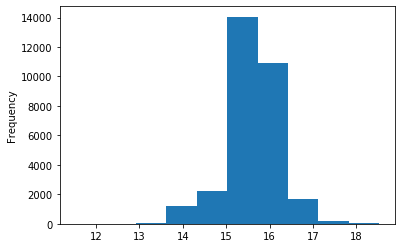

In [189]:
final["log_price_doc"].plot.hist()

In [190]:
new_final = final[new_col_list]
new_final = (new_final-new_final.mean())/new_final.std()

In [191]:
new_final["log_price_doc"] = final["log_price_doc"]

num_room Lambda:0.2836026183009949


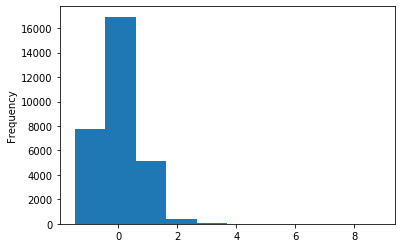

full_sq Intercept:1 Lambda:0.025161856291360155


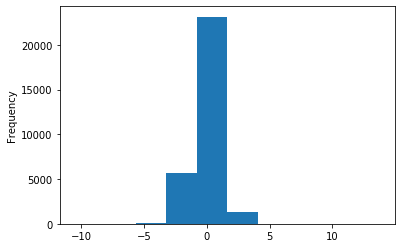

sport_count_5000 Intercept:1 Lambda:0.32140170736893614


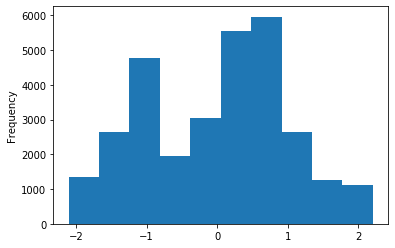

sport_count_3000 Intercept:1 Lambda:0.30905533650467476


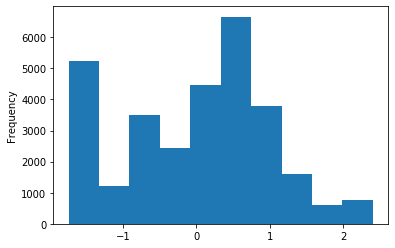

trc_count_5000 Intercept:1 Lambda:0.43505669051328044


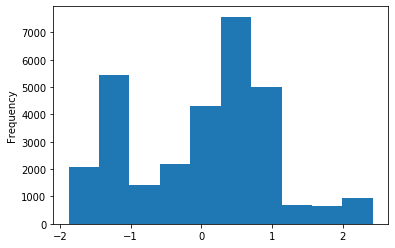

zd_vokzaly_avto_km Lambda:0.44136550670919344


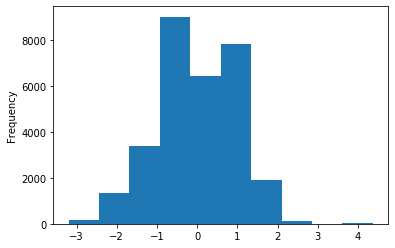

sadovoe_km Lambda:0.5328730260424563


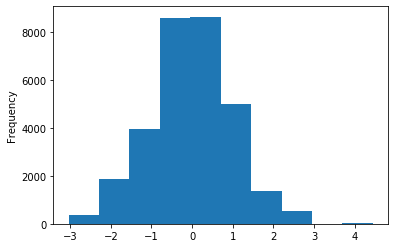

sport_count_2000 Intercept:1 Lambda:0.28370129011683337


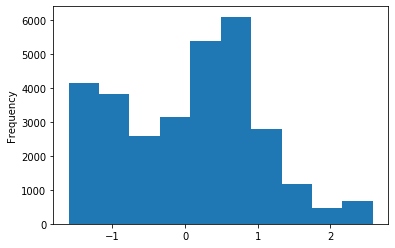

kremlin_km Lambda:0.6495650171225553


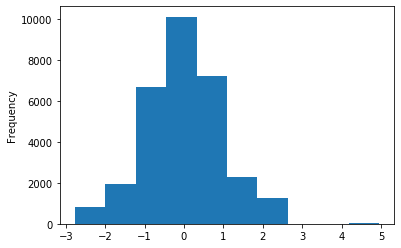

bulvar_ring_km Lambda:0.5946139348893952


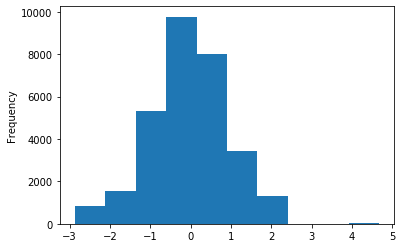

office_sqm_5000 Intercept:1 Lambda:0.20615210844087062


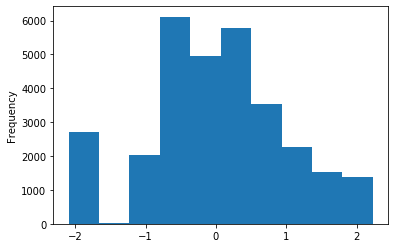

ttk_km Lambda:0.4392898390913131


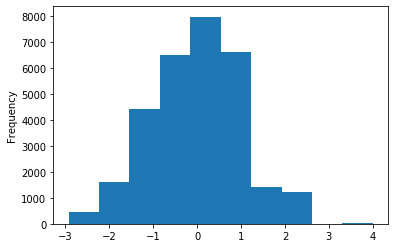

trc_sqm_5000 Intercept:1 Lambda:0.3621910039313262


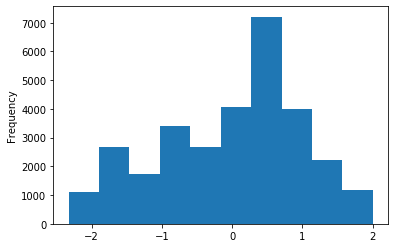

sport_count_1500 Intercept:1 Lambda:0.19982103647875274


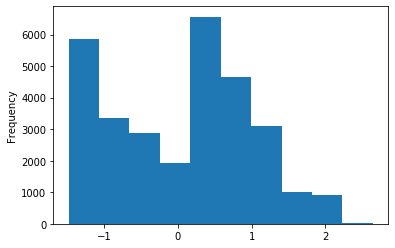

nuclear_reactor_km Lambda:0.37559280934897193


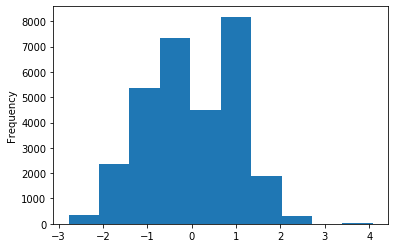

sport_objects_raion Intercept:1 Lambda:0.19706943477005495


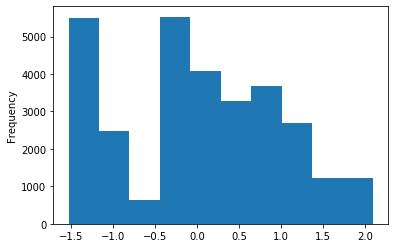

cafe_count_5000_price_1000 Intercept:1 Lambda:0.035053032889416254


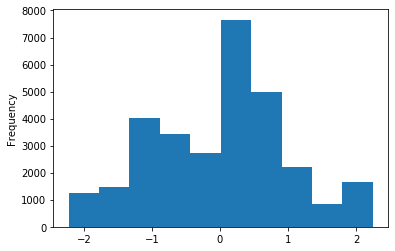

trc_count_3000 Intercept:1 Lambda:0.31953919898071986


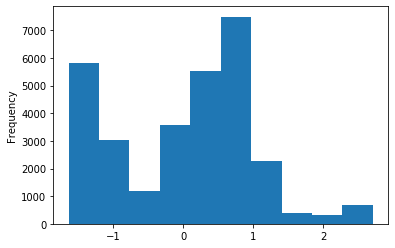

cafe_count_5000_price_1500 Intercept:1 Lambda:-0.07916142351243947


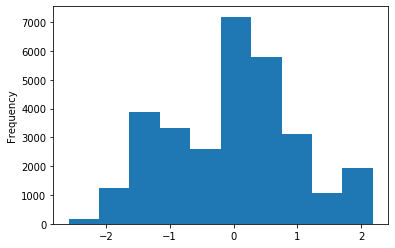

cafe_count_5000 Intercept:1 Lambda:-0.009653653182213314


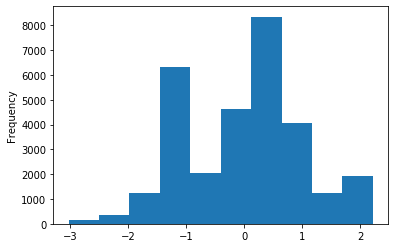

cafe_count_5000_na_price Intercept:1 Lambda:-0.07469803063371243


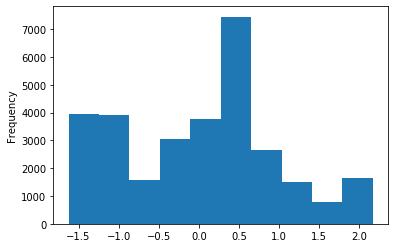

stadium_km Lambda:0.19107348063249893


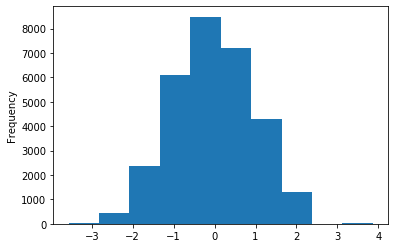

cafe_count_5000_price_500 Intercept:1 Lambda:0.002232622470951867


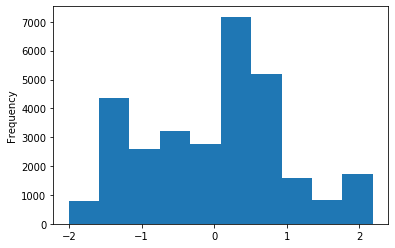

office_sqm_3000 Intercept:1 Lambda:0.14786003340588233


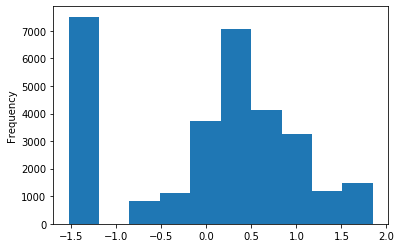

cafe_count_5000_price_2500 Intercept:1 Lambda:-0.16094059224041368


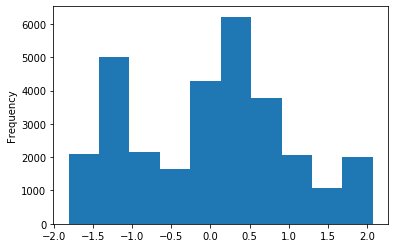

trc_sqm_3000 Intercept:1 Lambda:0.27315580773775117


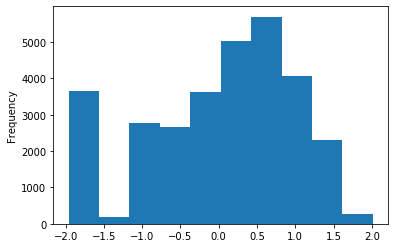

office_count_5000 Intercept:1 Lambda:-0.07416733912636893


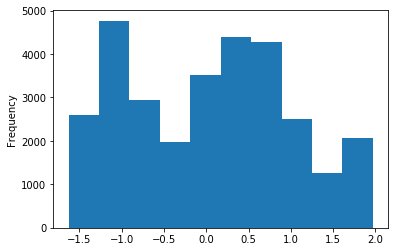

basketball_km Lambda:0.08320729825952483


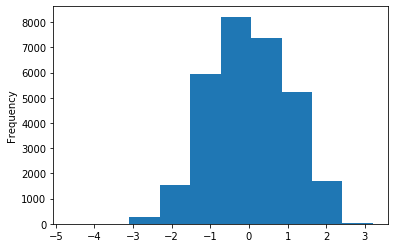

office_km Intercept:1.0 Lambda:-0.6400221819870336


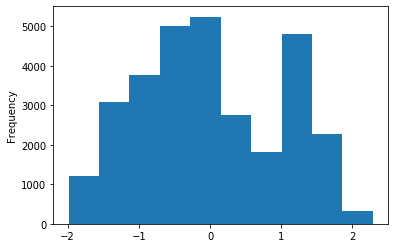

office_sqm_2000 Intercept:1 Lambda:0.11138476750260173


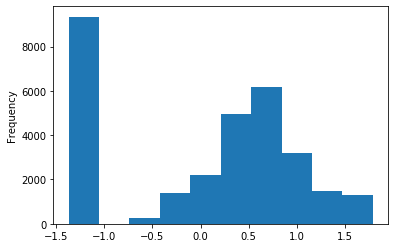

detention_facility_km Lambda:0.2781026424665704


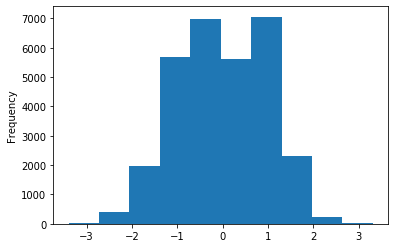

cafe_count_5000_price_high Intercept:1 Lambda:-2.043645315410284


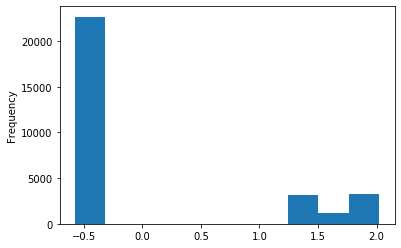

church_count_5000 Intercept:1 Lambda:-0.23537659279218404


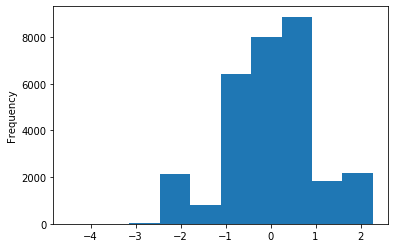

university_km Lambda:0.133717465549651


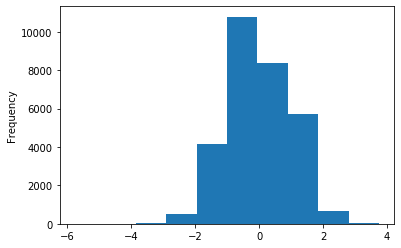

cafe_count_5000_price_4000 Intercept:1 Lambda:-0.4179404551614297


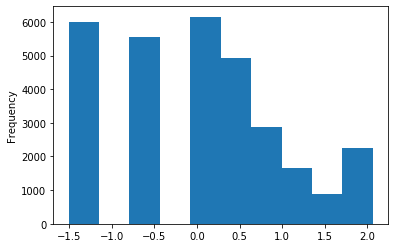

swim_pool_km Intercept:1.0 Lambda:-0.3036560379703942


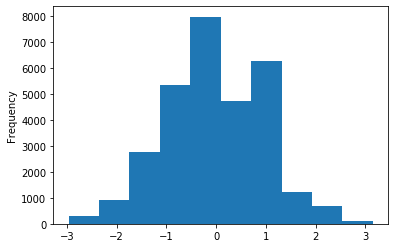

theater_km Lambda:0.34894085473971853


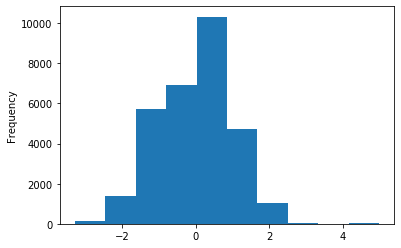

catering_km Lambda:0.1535224786329095


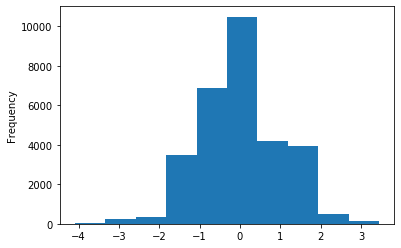

workplaces_km Intercept:1.0 Lambda:-0.3918833620849186


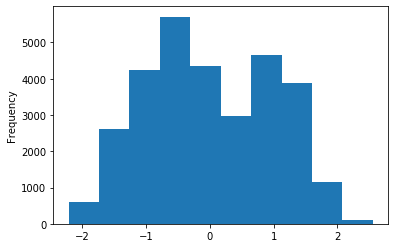

thermal_power_plant_km Lambda:0.11737781003146926


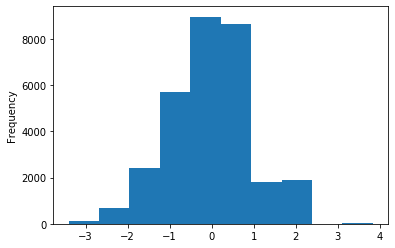

leisure_count_5000 Intercept:1 Lambda:-0.38063512376493736


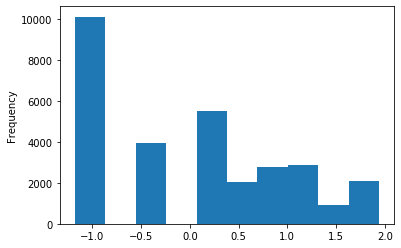

exhibition_km Lambda:0.16120408303534747


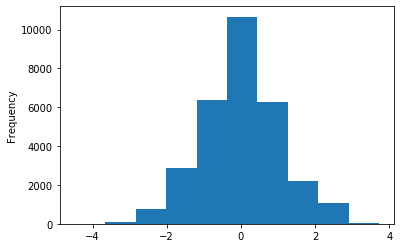

big_church_count_5000 Intercept:1 Lambda:-0.1542654703366491


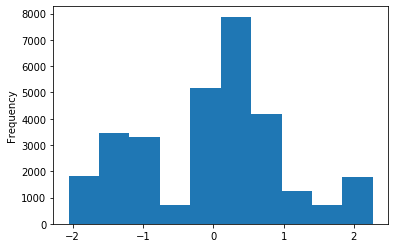

sport_count_1000 Intercept:1 Lambda:-0.07446983649390015


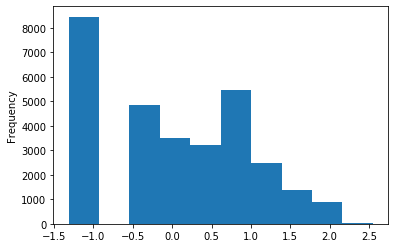

office_sqm_1500 Intercept:1 Lambda:0.07210760295995942


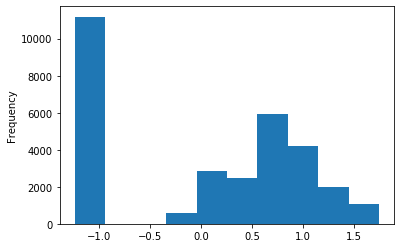

market_count_5000 Intercept:1 Lambda:0.3562947122422857


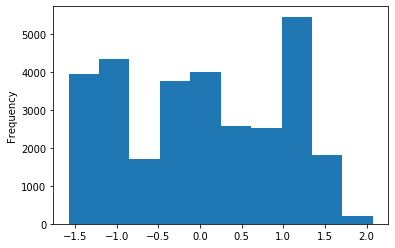

school_education_centers_raion Intercept:1 Lambda:0.6186376316537879


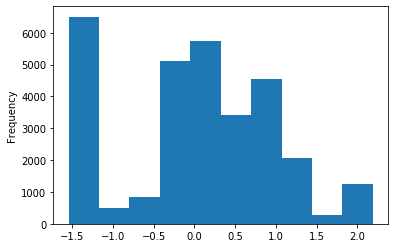

museum_km Lambda:0.2966856749850421


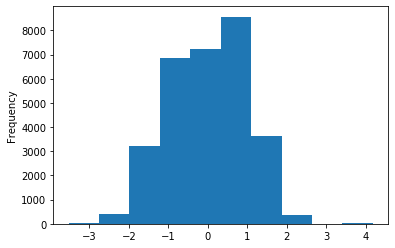

healthcare_centers_raion Intercept:1 Lambda:-0.3574704329814585


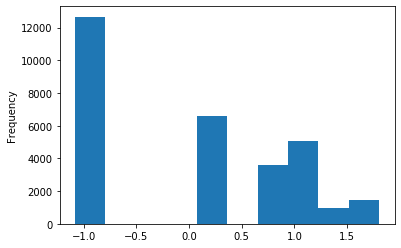

big_church_km Lambda:0.09628202404991423


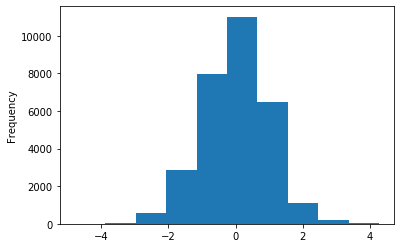

log_price_doc


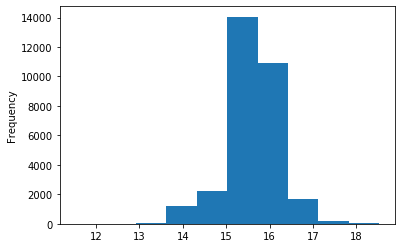

In [196]:
for col in new_final.columns:
    new_final[col].plot.hist()
    print(col)
    plt.show()

In [193]:
new_final.shape

(30292, 51)

In [192]:
new_final.mean()

num_room Lambda:0.2836026183009949                                      4.412716e-13
full_sq Intercept:1 Lambda:0.025161856291360155                         7.740644e-13
sport_count_5000 Intercept:1 Lambda:0.32140170736893614                 2.561367e-14
sport_count_3000 Intercept:1 Lambda:0.30905533650467476                 1.019287e-13
trc_count_5000 Intercept:1 Lambda:0.43505669051328044                  -1.019498e-13
zd_vokzaly_avto_km Lambda:0.44136550670919344                          -3.727754e-14
sadovoe_km Lambda:0.5328730260424563                                    7.333158e-15
sport_count_2000 Intercept:1 Lambda:0.28370129011683337                 2.199467e-13
kremlin_km Lambda:0.6495650171225553                                    2.711484e-14
bulvar_ring_km Lambda:0.5946139348893952                                7.518450e-14
office_sqm_5000 Intercept:1 Lambda:0.20615210844087062                 -1.501472e-14
ttk_km Lambda:0.4392898390913131                                 

In [195]:
new_final.to_csv("new_final.csv")

In [152]:
class Layer:
    # essentially a container to hold stored values across layers in forward propogation
    def __init__(self, h_x = None, sigma_h_x = None):
        self.h_x = h_x
        self.sigma_h_x = sigma_h_x


class NeuralNetwork:
    
    def __init__(self, layers, nodes, activation, loss, learning_rate, batch_size, anneal):
        
        # number of hidden layers we are creating
        self.num_layers = layers
        
        # number of nodes at each layer
        self.nodes = self._create_nodes(nodes,layers)
        
        # activation function
        self.sigma = activation
                
        # loss function
        self.loss = loss
        
        # learning rate for stochastic gradient descent
        self.lr = learning_rate
        self.true_lr = learning_rate
        # batch size for stochastic gradient descent
        self.batch_size = batch_size

        # after fit, will contain a dictionary of weights for the layers
        self.weight_dict = None
        
        # store values for backwards propagation
        self.stored = None
        
        self.anneal = anneal

        
    def _create_nodes(self, nodes, layers):
        # if given a number, creates an array with layers amount of nodes
        # otherwise returns the array of nodes
        # in both cases increments by 1 to account for bias
        if isinstance(nodes, int):
            return [nodes]*(layers)
        
        else:
            if len(nodes) != self.num_layers:
                raise Exception("Node array length does not match number of layers")
            return nodes
        
    def _create_weights(self,  num_features):
        
        zero_weight = np.random.normal(scale=math.sqrt(2/num_features) ,size=(num_features,self.nodes[0]))

        self.weight_dict = {
            
            0: np.vstack((np.zeros(self.nodes[0]),zero_weight))
        }
        
        for i in range(1,self.num_layers):
            
            weight = np.random.normal(scale=math.sqrt(2/num_features) ,size=(self.nodes[i-1],self.nodes[i]))
            self.weight_dict[i] = np.vstack((np.zeros(self.nodes[i]), weight))
            
        weight = np.random.normal(scale=math.sqrt(2/num_features) ,size=(self.nodes[self.num_layers-1],1))
        self.weight_dict[self.num_layers] = np.vstack((np.zeros(1), weight))


    def _forward_propagation(self, X, y):
        # performs forward_propagation and stores appropriate values
        
        sigma_h_x = X
        self.stored = {}
        self.stored[-1] = Layer(None, sigma_h_x)
        
        for i in range(0,self.num_layers):
            sigma_h_x = np.hstack([np.ones(len(sigma_h_x ))[:, np.newaxis], sigma_h_x]) # adds a weight intercept to the front  
            h_x = sigma_h_x @ self.weight_dict[i] 
            sigma_h_x = self.sigma(h_x) 
            self.stored[i] = Layer(h_x, sigma_h_x)
            
        sigma_h_x = np.hstack([np.ones(len(sigma_h_x))[:, np.newaxis], sigma_h_x])
        z_sigma_h_x = sigma_h_x @ self.weight_dict[self.num_layers]
        self.stored[self.num_layers] = Layer(z_sigma_h_x)
        
        return np.sum(self.loss(z_sigma_h_x, y))/self.batch_size 

    def _backward_propagation(self, X,y):
        # updates the weights based on the stored values from forward propagation
        
        num_layers = self.num_layers
        expected = self.stored[self.num_layers].h_x #z(sigma(h2(sigma(h1(x)))))
        
        # dL/dz(z(sigma(h2(sigma(h1(x))))))
        J = self.loss(expected, y, derivative = True)
        
        old_weights = self.weight_dict[num_layers][1:,:] 
        old_bias = self.weight_dict[num_layers][0:1,:] 

        
        new_weights = old_weights - self.lr*(self.stored[num_layers-1].sigma_h_x.T @ J)
        new_bias = old_bias - (self.lr * (np.array([np.ones(J.shape[0])]) @ J))

        self.weight_dict[num_layers] = np.vstack((new_bias, new_weights))

        J = J @ old_weights.T
        
        for i in range(self.num_layers-1,-1,-1):
           
            J = J * self.sigma(self.stored[i].h_x, derivative = True) # activation layer derivative

            old_weights = self.weight_dict[i][1:,:] 
            old_bias = self.weight_dict[i][0:1,:] 

            new_weights = old_weights - self.lr*(self.stored[i-1].sigma_h_x.T @ J)
            new_bias = old_bias - (self.lr * (np.array([np.ones(J.shape[0])]) @ J))

            self.weight_dict[i] = np.vstack((new_bias, new_weights))
            
            J = J @ old_weights.T  # dense layer derivative       
            

    # want to backwards prop then feedforward
    def _stochastic_gradient_descent(self, X, y, X_val, y_val, diff, max_epochs, print_iter):
        
        num_batches = math.ceil(X.shape[0]/self.batch_size)
        
        avg_err_arr = [np.nan]*(max_epochs)
        avg_acc_arr = [np.nan]*(max_epochs)

        
        for i in range(0, max_epochs):
            
            indices = np.random.choice(X.shape[0], X.shape[0], replace=False)
            x_batch = X[indices]
            y_batch =y[indices]
            
            old_start = 0
            new_start = 0
            new_end = self.batch_size
            mini_err_arr = [np.nan]*num_batches
            mini_err_arr[0] = self._forward_propagation(x_batch[new_start:new_end],y_batch[new_start:new_end])

            for j in range(1,num_batches):
                old_start = new_start
                new_start = old_start + self.batch_size
                new_end = new_start+self.batch_size
                
                self._backward_propagation(x_batch[old_start:new_start], y_batch[old_start:new_start])
                mini_err_arr[j] = self._forward_propagation(x_batch[new_start:new_end],y_batch[new_start:new_end])
 
                if print_iter:
                    sys.stdout.write("\r" +  str(i) +"     " +str(j))
                    sys.stdout.flush()
                    
            if i!= num_epochs-1:
                 self._backward_propagation(x_batch[new_start:],y_batch[new_start:])
                    
            if i%10 == 0:
                self.lr = self.lr * self.anneal
                
            avg_err_arr[i] = np.mean(mini_err_arr)
            
            preds = self.predict(X_val)
            rmse = np.sqrt(np.mean((preds-y_val)**2))
            
            avg_acc_arr[i] = rmse
            
            # ensures the accuracy is always improving significantly
            if i > 0 and (avg_acc_arr[i-1] - avg_acc_arr[i]) <= diff:
                return avg_err_arr[0:i+1], avg_acc_arr[0:i+1]
            
                
        return avg_err_arr, avg_acc_arr

    def fit(self, X,y, X_val, y_val, rmse_diff = 0.000001, max_epochs = 10, print_iter = False):
        # X is either a numpy array or a dataframe without the target and intercept
        # y is either a pandas series or a 1d (potentially numpy) array
        # returns a list of the average loss for each iteration
        # if print iter is true, prints the current iteration (will be written on a single line, not multiple)
        self.lr = self.true_lr
        if isinstance(X, pd.DataFrame):
            new_x = X.to_numpy()
        else:
            new_x = copy.deepcopy(X)
            
        if isinstance(X_val, pd.DataFrame):
            new_x_val = X_val.to_numpy()
        else:
            new_x_val = copy.deepcopy(X_val)
            
        if isinstance(y, pd.Series):
            new_y = y.to_numpy()
        if len(y.shape) == 1:
            new_y = np.array([new_y]).T
        else:
            new_y = copy.deepcopy(y)
        
        if isinstance(y_val, pd.Series):
            new_y_val = y_val.to_numpy()
        if len(y_val.shape) == 1:
            new_y_val = np.array([new_y_val]).T
        else:
            new_y_val = copy.deepcopy(y_val)
            
        # generate the random weights for every layer in neural network
        self._create_weights(new_x.shape[1])
        
        vals = self._stochastic_gradient_descent(new_x,new_y,new_x_val, new_y_val, rmse_diff, max_epochs, print_iter)
        

        return vals 
    def predict(self, X):
        
        sigma_h_x = X
        
        for i in range(0,self.num_layers):
            sigma_h_x = np.hstack([np.ones(len(sigma_h_x ))[:, np.newaxis], sigma_h_x ]) # adds a weight intercept  
            h_x = sigma_h_x @ self.weight_dict[i] 
            sigma_h_x = self.sigma(h_x) 
            
        sigma_h_x = np.hstack([np.ones(len(sigma_h_x))[:, np.newaxis], sigma_h_x ])
        z_sigma_h_x = sigma_h_x @ self.weight_dict[self.num_layers]
        return z_sigma_h_x.T[0]
        
        return np.sum(self.loss(z_sigma_h_x, y))/self.batch_size 

# loss and activation function to use in 

def L2_loss(x,y, derivative = False):
    # assumes y is nx1 vector (n rows, 1 col)
    # returns an nx1 matrix
    if derivative:
        return x-y
    else:
        return 0.5*((x-y)**2)
        
def ReLU(X, derivative = False):

    if derivative:
        return np.greater(X, 0).astype(int)
    return np.maximum(X,0)      

In [153]:
house_df = new_final

In [154]:
house_df.head()

,num_room Lambda:0.2836026183009949,full_sq Intercept:1 Lambda:0.025161856291360155,sport_count_5000 Intercept:1 Lambda:0.32140170736893614,sport_count_3000 Intercept:1 Lambda:0.30905533650467476,trc_count_5000 Intercept:1 Lambda:0.43505669051328044,zd_vokzaly_avto_km Lambda:0.44136550670919344,sadovoe_km Lambda:0.5328730260424563,sport_count_2000 Intercept:1 Lambda:0.28370129011683337,kremlin_km Lambda:0.6495650171225553,bulvar_ring_km Lambda:0.5946139348893952,...,exhibition_km Lambda:0.16120408303534747,big_church_count_5000 Intercept:1 Lambda:-0.1542654703366491,sport_count_1000 Intercept:1 Lambda:-0.07446983649390015,office_sqm_1500 Intercept:1 Lambda:0.07210760295995942,market_count_5000 Intercept:1 Lambda:0.3562947122422857,school_education_centers_raion Intercept:1 Lambda:0.6186376316537879,museum_km Lambda:0.2966856749850421,healthcare_centers_raion Intercept:1 Lambda:-0.3574704329814585,big_church_km Lambda:0.09628202404991423,log_price_doc
0,0.199219,-0.446445,0.287375,0.353503,0.944244,-0.119057,0.046398,0.324789,0.011570,-0.023209,...,0.668943,0.625649,1.104190,0.539685,-0.169426,0.202273,0.359487,0.181788,-0.900544,15.581952
1,0.148644,-1.080909,0.547184,0.254593,0.581700,-0.732242,-0.928642,0.422398,-0.857785,-0.784926,...,-0.591711,0.734571,0.093569,0.777096,1.378176,0.945838,-1.883422,0.181788,-0.467237,15.607270
2,0.053083,-0.446445,0.564272,0.304862,0.412923,-0.691041,-0.839202,0.108657,-0.802910,-0.797005,...,0.242255,0.497087,0.925039,-1.235984,0.878318,0.710304,-0.638874,0.181788,0.811277,15.555977
3,0.427310,1.561353,-0.359717,0.202557,-0.100545,0.216492,0.558399,0.601350,0.520699,0.519665,...,0.259326,-0.293993,0.443878,0.246505,-0.416304,1.388850,1.516834,0.181788,-0.402103,16.388123
4,1.293615,1.156961,2.022179,1.984695,2.319115,-2.308107,-2.897051,1.173512,-1.950704,-2.363572,...,-1.163120,2.206065,1.257724,1.466472,1.378176,1.171576,-1.172622,1.439273,-1.377484,16.608603


In [168]:
target = "log_price_doc"
#drop_cols = ["trc_sqm_5000", "office_sqm_3000","trc_sqm_3000", "office_sqm_2000","office_sqm_1500"]
X = house_df.drop([target], axis=1)
y = final["price_doc"]/100000

In [175]:
y 

0         58.50000
1         60.00000
2         57.00000
3        131.00000
4        163.31452
           ...    
30287     74.00000
30288    250.00000
30289     69.70959
30290    135.00000
30291     56.00000
Name: price_doc, Length: 30292, dtype: float64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [177]:
layers = 7
nodes = 9
activation = ReLU
loss = L2_loss
learning_rate = 0.0001
batch_size = 256
num_epochs = 200
anneal = 0.5

test_nn = NeuralNetwork(layers, nodes, activation, loss, learning_rate, batch_size, anneal = anneal)

errs, rmses = test_nn.fit(X_train,y_train, X_val, y_val,  rmse_diff = 0.1, max_epochs = num_epochs, print_iter = True)

199     70

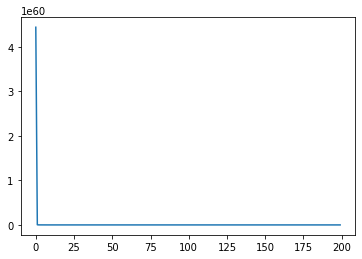

In [178]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot([i for i in range(0,len(errs))], errs)

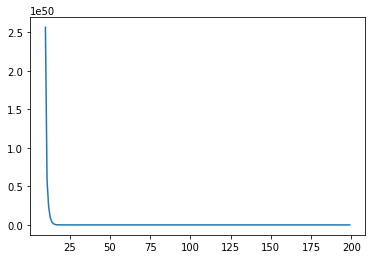

In [182]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot([i for i in range(10,len(errs))], errs[10:])

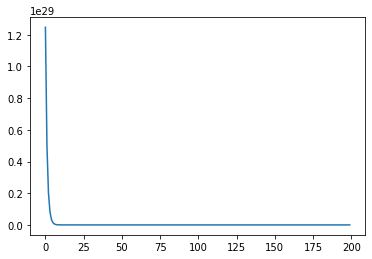

In [183]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot([i for i in range(0,len(rmses))], rmses)

In [184]:
preds = test_nn.predict(X_test)
rmse = np.sqrt(np.mean((preds-y_test)**2))
rmse, y.std()

(1.476648179141206e+21, 47.821700201078784)